In [1]:
# Imports
import music21
from music21 import converter
from music21.pitch import Pitch
from music21.note import Note
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('../')

from hexachord.solmization import Solmization
from hexachord.gamut_graph import HardGamutGraph, SoftGamutGraph
from hexachord.utils import as_stream

## Issue 1: many paths of identical cost

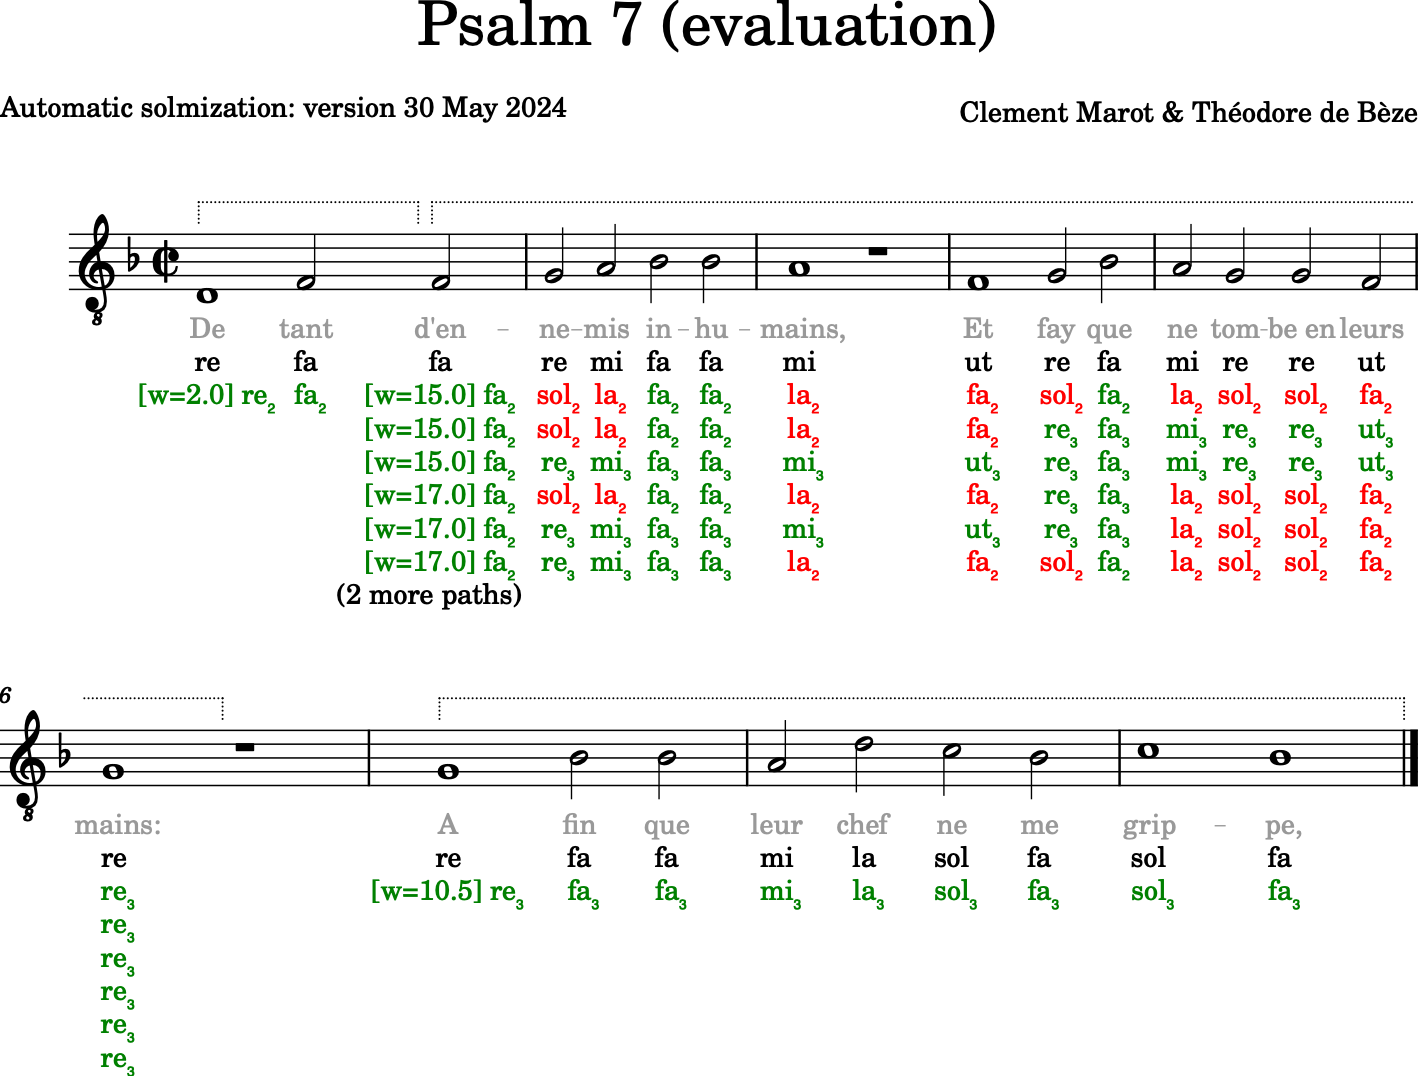

In [4]:
score = music21.converter.parse('../scores/issues/issue-01.mxl')
solmization = Solmization(score)
solmization.annotate(score.parts[0],
    target_lyrics=2, 
    lyric_offset=3,
    grey_lyrics_num=1
)
score.show()

The many paths here are caused by the jumps between F and B-flat in a soft gamut:

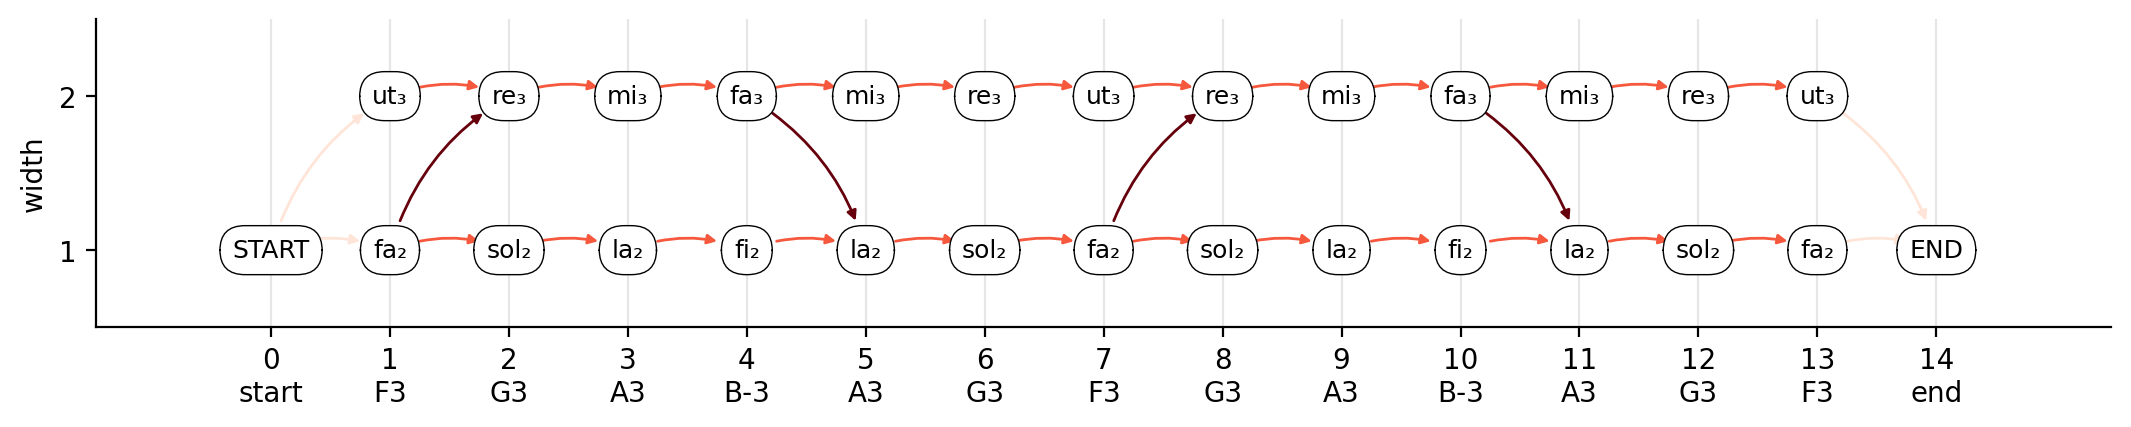

In [5]:
stream = as_stream('F3 B-3 F3 B-3 F3')
sol = Solmization(stream, gamut='soft')
sol.annotate(stream)
sol.draw()

Here is the skeleton resulting in multiple paths of identical cost. The question is basically where you mutate to the next hexichord. The target annotation mutates immediately, avoiding extensive fa-super-la's. So one fix would be to increase the fa-super-la weight.

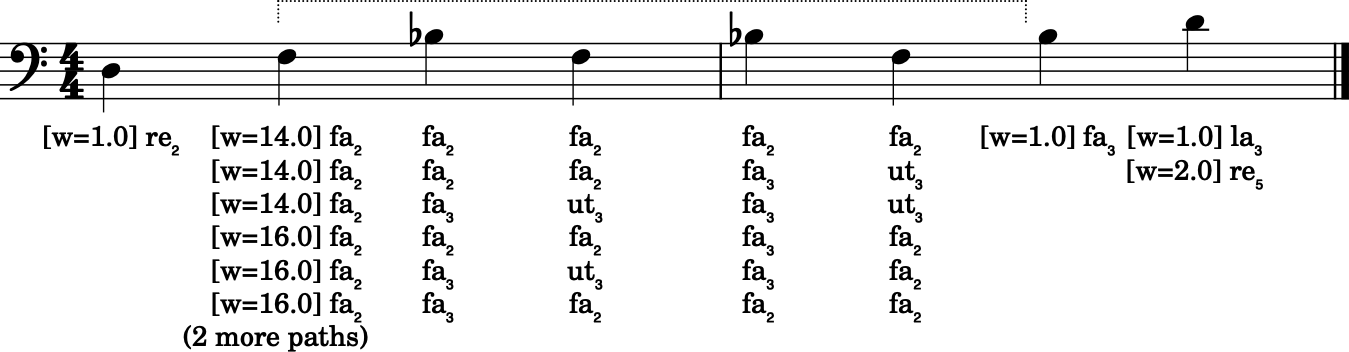

In [6]:
stream = as_stream('D3 F3 B-3 F3 B-3 F3 B-3 D4')
sol = Solmization(stream, gamut='soft')
sol.annotate(stream)
stream.show()

## TBR: Issue 2 from psalm 2

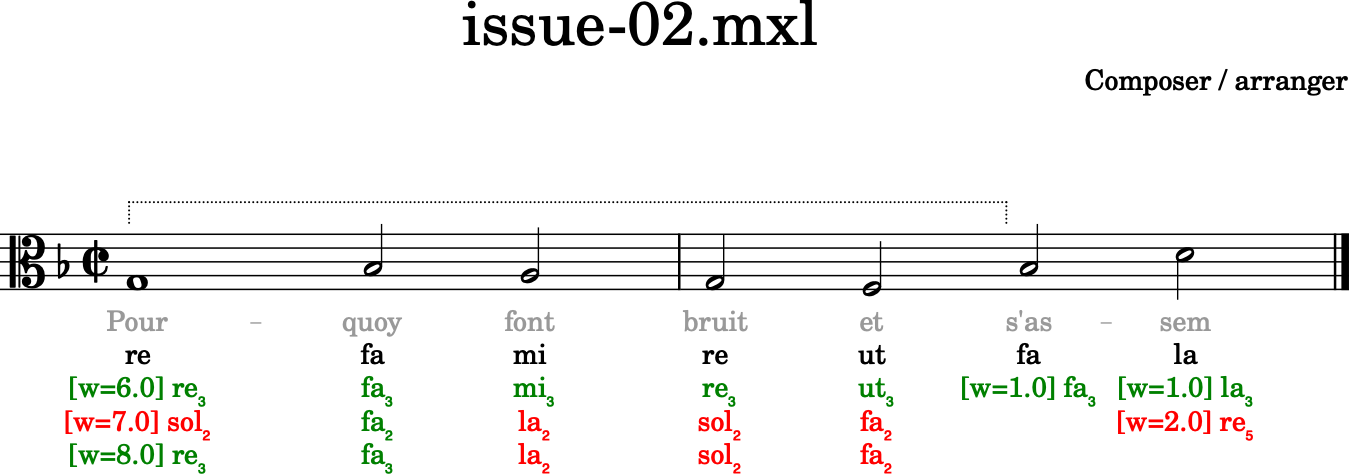

In [7]:
source_fn = '../scores/issues/issue-02.mxl'
score = music21.converter.parse(source_fn)
solmization = Solmization(score)
solmization.annotate(score.parts[0],
    target_lyrics=2, 
    lyric_offset=3,
    grey_lyrics_num=1
)
score.show()

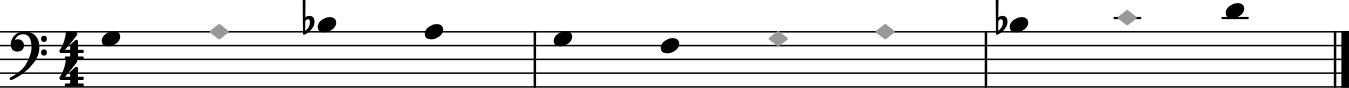

In [8]:
solmization.show_steps()

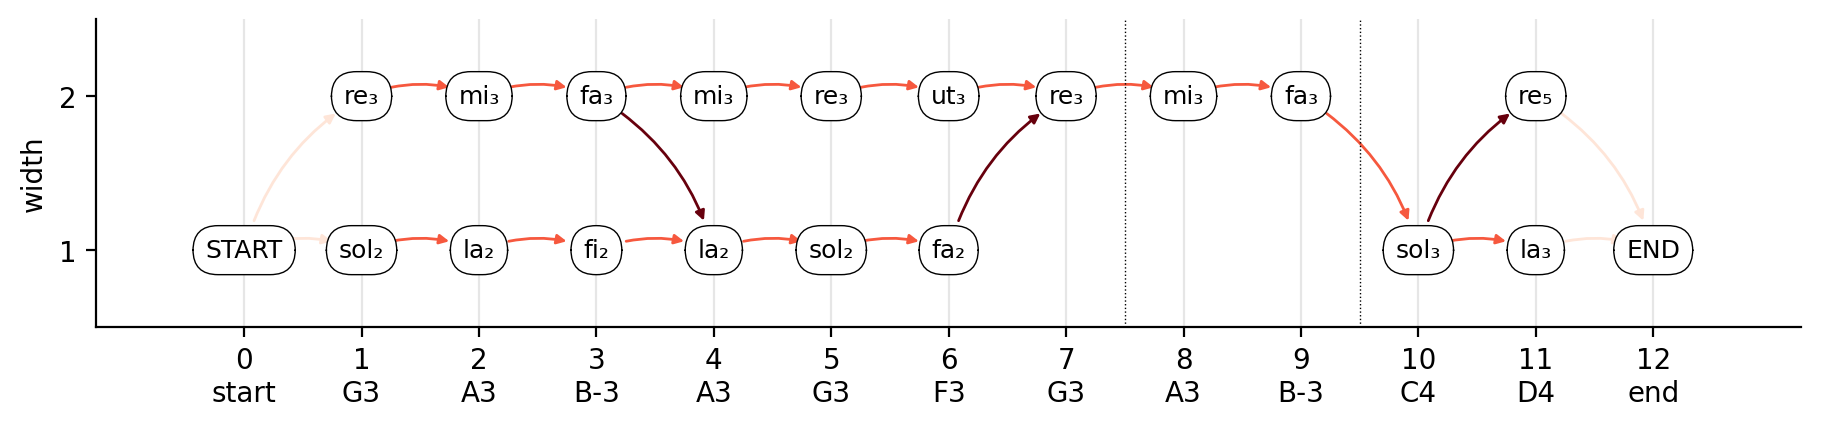

In [9]:
solmization.draw()

## Issue from psalm 4

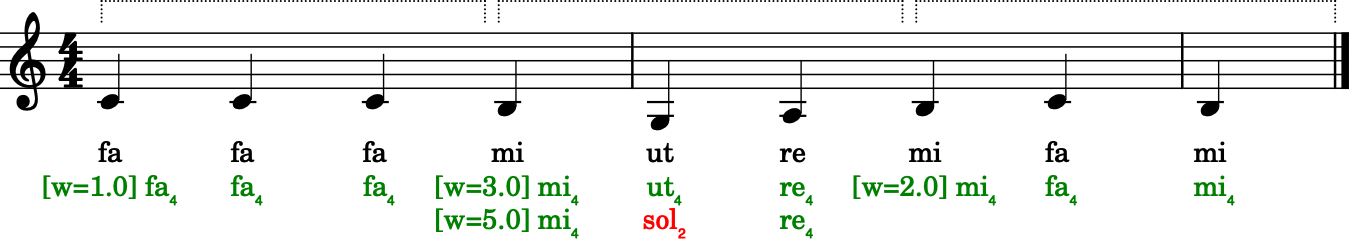

In [10]:
exPsalm04 = 'C4 C4 C4 B3 G3 A3 B3 C4 B3'
pitches = [Pitch(p) for p in exPsalm04.split(' ')]
stream = music21.stream.Stream([Note(p) for p in pitches])
targets = 'fa fa fa mi ut re mi fa mi'.split(' ')
for note, syll in zip(stream, targets): note.lyric = syll
sol = Solmization(stream, gamut='hard')
sol.annotate(stream, targets=targets, lyric_offset=2)
stream.show()

### Next steps
- Can I identify the exact hexachords used for a given target sequence of syllables? And can I indeed reproduce the target solmization?

### Issues

- **Accidentals**
- **Psalm 8 m.13** On 'devorant', the target solmisation is not even a candidate. What's this? 
- **Psalm 10 m.1** Target is not a candidate
- **Slurs**, e.g. Psalm 14, m. 18

## Notes

### Parse graphs change when extending the sequence

Note that adding pitches may change the parse graph: depending on how the sequence continues, certain paths may be pruned. If a sequence $A$ is a prefix of $B$, the parse graph of $A$ need not be a subgraph of $B$. Here is a simple example:

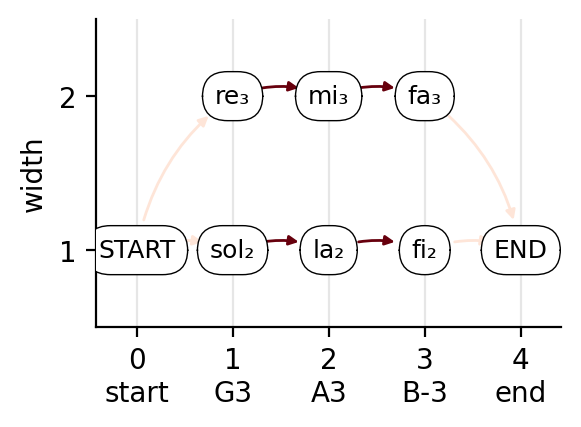

In [11]:
Solmization('G3 B-3'.split(' '), gamut='soft').draw()

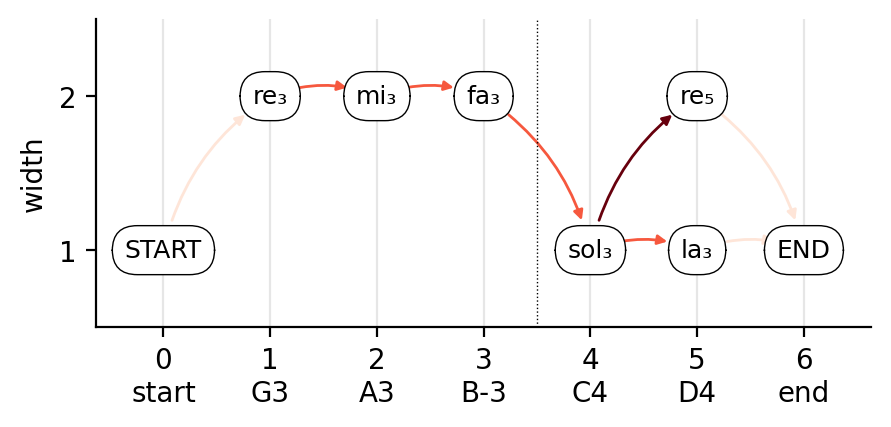

In [12]:
Solmization('G3 B-3 D4'.split(' '), gamut='soft').draw()